In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
class MultiArmBandit:
    def __init__(self, n_arms, means, std_devs):
        self.n_arms = n_arms
        self.means = means
        self.std_devs = std_devs
    
    def pull(self, arm):
        return np.random.normal(self.means[arm], self.std_devs[arm])

In [4]:
def pure_exploitation(bandit, n_steps):
    total_reward = 0
    rewards = []
    arm_counts = np.zeros(bandit.n_arms)
    arm_rewards = np.zeros(bandit.n_arms)
    
    for t in range(n_steps):
        best_arm = np.argmax(arm_rewards / (arm_counts + 1e-5))
        reward = bandit.pull(best_arm)
        arm_counts[best_arm] += 1
        arm_rewards[best_arm] += reward
        total_reward += reward
        rewards.append(total_reward)
    return rewards

def epsilon_greedy(bandit, n_steps, epsilon):
    total_reward = 0
    rewards = []
    arm_counts = np.zeros(bandit.n_arms)
    arm_rewards = np.zeros(bandit.n_arms)
    
    for t in range(n_steps):
        if np.random.rand() < epsilon:
            arm = np.random.randint(0, bandit.n_arms)
        else:
            arm = np.argmax(arm_rewards / (arm_counts + 1e-5))
        
        reward = bandit.pull(arm)
        arm_counts[arm] += 1
        arm_rewards[arm] += reward
        total_reward += reward
        rewards.append(total_reward)
    
    return rewards

def pure_exploration(bandit, n_steps):
    total_reward = 0
    rewards = []
    
    for t in range(n_steps):
        arm = np.random.randint(0, bandit.n_arms)
        reward = bandit.pull(arm)
        total_reward += reward
        rewards.append(total_reward)
        
    return rewards

def fixed_exploration_then_exploitation(bandit, n_steps, n_explore):
    total_reward = 0
    rewards = []
    arm_counts = np.zeros(bandit.n_arms)
    arm_rewards = np.zeros(bandit.n_arms)
    
    for t in range(n_explore):
        arm = np.random.randint(0, bandit.n_arms)
        reward = bandit.pull(arm)
        arm_counts[arm] += 1
        arm_rewards[arm] += reward
        total_reward += reward
        rewards.append(total_reward)
    
    for t in range(n_explore, n_steps):
        best_arm = np.argmax(arm_rewards / (arm_counts + 1e-5))
        reward = bandit.pull(best_arm)
        arm_counts[best_arm] += 1
        arm_rewards[best_arm] += reward
        total_reward += reward
        rewards.append(total_reward)
    
    return rewards

def ucb(bandit, n_steps):
    total_reward = 0
    rewards = []
    arm_counts = np.zeros(bandit.n_arms)
    arm_rewards = np.zeros(bandit.n_arms)
    
    for t in range(n_steps):
        if t < bandit.n_arms:
            arm = t
        else:
            ucb_values = arm_rewards / (arm_counts + 1e-5) + np.sqrt(2 * np.log(t + 1) / (arm_counts + 1e-5))
            arm = np.argmax(ucb_values)
        
        reward = bandit.pull(arm)
        arm_counts[arm] += 1
        arm_rewards[arm] += reward
        total_reward += reward
        rewards.append(total_reward)
    
    return rewards

In [5]:
def simulate_bandit(strategy, bandit, n_steps, **kwargs):
    return np.array(strategy(bandit, n_steps, **kwargs))

def plot_comparison(rewards_dict, n_steps):
    colors = ["red", "blue", "green", "orange", "purple"]
    plt.figure(figsize=(12, 8))
    for i, (label, rewards) in enumerate(rewards_dict.items()):
        plt.plot(range(n_steps), rewards, label=label, color=colors[i], linestyle='-', linewidth=2)
    plt.xlabel("Steps", fontsize=14)
    plt.ylabel("Cumulative Reward", fontsize=14)
    plt.title("Comparison of Strategies", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

def calculate_regret(bandit, n_steps, rewards):
    optimal_reward = np.max(bandit.means) * n_steps
    return optimal_reward - rewards[-1]


In [6]:
n_arms = 5
means = np.random.uniform(0, 1, n_arms)
std_devs = np.ones(n_arms) * 0.1
bandit = MultiArmBandit(n_arms, means, std_devs)

# Simulation Parameters
n_steps = 1000
n_explore = 100

In [7]:
rewards_pure_exploitation = simulate_bandit(pure_exploitation, bandit, n_steps)
rewards_pure_exploration = simulate_bandit(pure_exploration, bandit, n_steps)
rewards_fixed_explore = simulate_bandit(fixed_exploration_then_exploitation, bandit, n_steps, n_explore=n_explore)
rewards_epsilon_greedy = simulate_bandit(epsilon_greedy, bandit, n_steps, epsilon=0.1)
rewards_ucb = simulate_bandit(ucb, bandit, n_steps)

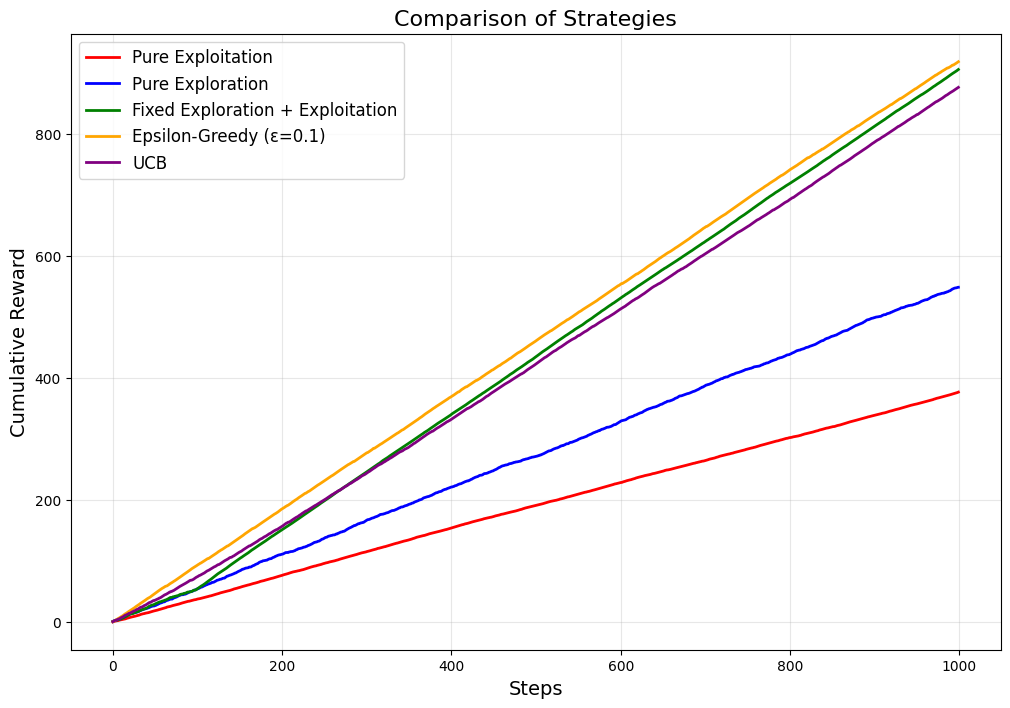

In [8]:
rewards_dict = {
    "Pure Exploitation": rewards_pure_exploitation,
    "Pure Exploration": rewards_pure_exploration,
    "Fixed Exploration + Exploitation": rewards_fixed_explore,
    "Epsilon-Greedy (\u03b5=0.1)": rewards_epsilon_greedy,
    "UCB": rewards_ucb
}
plot_comparison(rewards_dict, n_steps)

In [9]:
print(f"Regret - Pure Exploitation: {calculate_regret(bandit, n_steps, rewards_pure_exploitation):.2f}")
print(f"Regret - Pure Exploration: {calculate_regret(bandit, n_steps, rewards_pure_exploration):.2f}")
print(f"Regret - Fixed Exploration + Exploitation: {calculate_regret(bandit, n_steps, rewards_fixed_explore):.2f}")
print(f"Regret - Epsilon-Greedy: {calculate_regret(bandit, n_steps, rewards_epsilon_greedy):.2f}")
print(f"Regret - UCB: {calculate_regret(bandit, n_steps, rewards_ucb):.2f}")

Regret - Pure Exploitation: 573.64
Regret - Pure Exploration: 401.63
Regret - Fixed Exploration + Exploitation: 44.38
Regret - Epsilon-Greedy: 31.60
Regret - UCB: 73.67
